<a href="https://colab.research.google.com/github/moseevaevgeniya/Certificates/blob/main/Moseeva%20Evgenia/Ozon_marketplace_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%">
  <tr style="background-color: blue; color: white;">
    <td><b><font size="6">Проект: Прогнозирование продаж товаров на маркетплейсах</font></b></td>
  </tr>
</table>

**⚡️Техническое задание (ТЗ) для проекта AI:**

**Основная цель: Разработка и реализация алгоритмов AI для выполнения следующих подзадач:**

- Определение корреляции по всем параметрам статистики для понимания работы алгоритмов в разных категориях и их зависимостей.
- Прогнозирование продаж для любого клиента в категории на основе общих продаж всех продавцов в этой категории.
- Прогнозирование продаж товара в нескольких вариантах с учетом данных общих продаж, статистики товара и аудита карточки товара.
Входные данные: Большой набор данных с метриками с маркетплейса.

**Технологический стек: Python, Pandas, Scikit-Learn, TensorFlow/Keras, Git/GitHub для версионирования кода.**

Методология разработки: Гибкая методология разработки, с еженедельными спринтами и ежедневными вопросами в чате для обсуждения прогресса и проблем.

## **1.Определение корреляции по всем параметрам статистики для понимания работы алгоритмов в разных категориях и их зависимостей.**

In [ ]:
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
pd.set_option('display.max_columns', None) # Устанавливаем максимальное количество отображаемых колонок
import seaborn as sns; sns.set() #визуализация
import numpy as np # здесь она используется для создания координатной сетки
                   #(с помощью функции np.meshgrid) и для расчета
                   #значений матрицы корреляций (с помощью функции correlations.values)
                   # и для работы с массивами
from sklearn.preprocessing import LabelEncoder # это класс из библиотеки scikit-learn (sklearn),
                                               #который используется для кодирования меток классов в числовой формат.
                                               #Это часто используется в задачах машинного обучения, когда требуется преобразовать
                                               #категориальные значения в числовые, чтобы модели машинного обучения могли работать
                                               #с этими данными.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error  # для решения задачи с использованием градиентного бустинга в библиотеке scikit-learn
from sklearn.metrics import mean_absolute_error, r2_score  # для импорта двух функций-метрик из модуля sklearn.metrics.
                                                # mean_absolute_error (средняя абсолютная ошибка) и r2_score (коэффициент детерминации)
                                                # являются популярными метриками для оценки качества моделей машинного обучения, особенно в задачах регрессии.
                                                # mean_absolute_error позволяет оценить среднюю абсолютную разницу между фактическими
                                                # и прогнозируемыми значениями.
                                                # Она показывает, насколько близко прогнозы модели к фактическим значениям.
                                                #r2_score рассчитывает коэффициент детерминации, который измеряет долю объясненной дисперсии моделью в данных.
                                                #Коэффициент детерминации показывает, насколько хорошо модель соответствует данным и объясняет их вариации.
                                                # Импорт этих функций позволяет использовать данные метрики для оценки качества моделей в нашем коде.
                                                # Мы можем применить эти метрики на наших прогнозах и фактических значениях,
                                                # чтобы получить числовые оценки точности и эффективности модели.

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **1.1 Загрузка, осмотр, предобработка данных и EDA.**

Путь к файлу: /content/gdrive/MyDrive/УИИ/Стажировка/База.csv

#### **1.1.1 Работаем с файлом baza.csv**

In [ ]:
# Загружаем базу
baza = pd.read_csv('/content/gdrive/MyDrive/УИИ/Стажировка/baza.csv',sep=";")
baza.head()

,Артикул,Ozon Product ID,FBO OZON SKU ID,FBS OZON SKU ID,Barcode,Наименование товара,Контент-рейтинг,Бренд,Статус товара,Видимость FBO,Причины скрытия FBO (при наличии),Видимость FBS,Причины скрытия FBS (при наличии),Дата создания,Коммерческая категория,"Объем товара, л","Объемный вес, кг","Доступно на складе Ozon, шт","Вывезти и нанести КИЗ (кроме Твери), шт","Зарезервировано, шт","Доступно на моих складах, шт","Зарезервировано на моих складах, шт","Текущая цена с учетом скидки, руб.","Цена до скидки (перечеркнутая цена), руб.","Цена Premium, руб.","Рыночная цена, руб.",Актуальная ссылка на рыночную цену,"Размер НДС, %"
0,'30273,105606938,298131117,298131122,2000000036618,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-08-03 10:32:38,Фонарь задний для авто,'1.00,'0.2,0,0,0,26,0,1200.0,1800.0,NaN,NaN,NaN,0%
1,'30383,105742204,298264198,298264234,2000000037899,Биксеноновая линза GNX Hella 3R Crystal Vision...,'37.5,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-08-03 14:58:10,Фара автомобильная,'3.00,'0.6,0,0,0,410,0,1990.0,3500.0,NaN,NaN,NaN,0%
2,'31284,112525698,303785665,303785701,NaN,Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K ...,'30,Aozoom,Продается,Показывается,NaN,Показывается,NaN,2021-08-16 09:48:31,Фара автомобильная,'6.30,'1.3,0,0,0,10,0,7900.0,NaN,NaN,NaN,NaN,0%
3,'25775,175507357,409388811,409388809,2000000005034,Герметик для фар жесткий бутиловый черный (4 м...,'17.5,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-12-02 08:31:59,Фара автомобильная,'1.88,'0.6,0,0,0,873,0,1200.0,NaN,NaN,NaN,NaN,0%
4,'29740,175521273,409666236,409666237,2000000030531,Линзы ксенон для фар Ford Focus 2 2007-2011 (C...,'15,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-12-02 08:48:02,Фара автомобильная,'6.00,'1.2,0,0,0,47,0,4500.0,6300.0,NaN,NaN,NaN,0%


Посмотрим на сводную информацию о наборе данных

In [ ]:
baza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1263 non-null   object 
 1   Ozon Product ID                            1263 non-null   int64  
 2   FBO OZON SKU ID                            1263 non-null   int64  
 3   FBS OZON SKU ID                            1263 non-null   int64  
 4   Barcode                                    1205 non-null   object 
 5   Наименование товара                        1263 non-null   object 
 6   Контент-рейтинг                            1263 non-null   object 
 7   Бренд                                      1258 non-null   object 
 8   Статус товара                              1263 non-null   object 
 9   Видимость FBO                              1263 non-null   object 
 10  Причины скрытия FBO (при

В нашем файле 28 столбцов и 1263 строки.  
Тип данных в 16 столбцах object и в 8 столбцах тип данных int64 и в 4 столбцах - float. Нужно провести исследование данных: определить нужные столбцы и от ненужных столбцов избавиться. При необходимости преобразовать данные в столбцах, заполнить пустые значения, дополнить датафрейм необходимыми расчетами в отдельный столбец.  

##### **Предобработка и EDA файла baza.csv**

In [ ]:
# Найдём дубликаты
baza.duplicated().sum()

0

In [ ]:
 # Найдем доли пропусков  в  столбцах
baza.isna().mean().sort_values(ascending=False)

Цена Premium, руб.                           1.000000
Актуальная ссылка на рыночную цену           0.988915
Рыночная цена, руб.                          0.988915
Причины скрытия FBS (при наличии)            0.984165
Причины скрытия FBO (при наличии)            0.978622
Цена до скидки (перечеркнутая цена), руб.    0.125891
Barcode                                      0.045922
Текущая цена с учетом скидки, руб.           0.004751
Бренд                                        0.003959
Артикул                                      0.000000
Объемный вес, кг                             0.000000
Зарезервировано на моих складах, шт          0.000000
Доступно на моих складах, шт                 0.000000
Зарезервировано, шт                          0.000000
Вывезти и нанести КИЗ (кроме Твери), шт      0.000000
Доступно на складе Ozon, шт                  0.000000
Коммерческая категория                       0.000000
Объем товара, л                              0.000000
Ozon Product ID             

In [ ]:
# Посмотрим уникальные значения столбца `Видимость FBO`
unique_FBO = baza['Видимость FBO'].unique()
print(unique_FBO)

['Показывается' 'Скрыт']


В столбце `Видимость FBO`есть данные, которые скрыты. Возможны несколько причин, из-за которых товары с видимостью FBO могут быть скрыты:   

1. Нарушение требований Озона: Если товар не соответствует требованиям и политикам Озона, он может быть временно скрыт или отключен из-за нарушений.  

2. Нарушение ограничений по категории товара: Некоторые категории товаров могут иметь дополнительные требования или ограничения, и товары, не соответствующие им, могут быть невидимыми.  

3. Проблемы с поставкой товаров или запасами: Если у продавца возникли проблемы с поставкой товаров или недостаточностью товарных запасов, это может привести к временному отключению видимости FBO-товаров.  

4. Административные или технические проблемы: Возможны сбои в системе Озона или административные проблемы, которые могут вызывать проблемы с видимостью товаров.  
Поэтому мы избавимся от строк в датафрейме, где в столбце `Видимость FBO` скрыты данные:  

In [ ]:
#Удаляем ненужные данные и перезапишем наш датафрейм
baza = baza[baza['Видимость FBO'] != 'Скрыт'].copy()

In [ ]:
# Посмотрим уникальные значения столбца `Видимость FBS`
unique_FBS = baza['Видимость FBS'].unique()
print(unique_FBO)

['Показывается' 'Скрыт']


В этом случае, мы не будем удалять данные.  
 Видимость FBS" - это параметр, указывающий на видимость товара на площадке Озона в случае использования службы "Fulfilled By Seller" (FBS), то есть, при самостоятельной отгрузке и обработке товаров продавцом.Если "Видимость FBS" скрыта,то это может быть ручным скрытие товара: Продавец самостоятельно скрыл товар из публичной видимости на площадке Озона:  из-за проблем с доступностью, актуальностью или по другим причинам.

In [ ]:
# Добавим новый столбец, в котором сложим данные в двух столбцах `Доступно на складе Ozon, шт` и `Доступно на моих складах, шт`
baza['Доступно на складах'] = baza['Доступно на складе Ozon, шт']+baza['Доступно на моих складах, шт']

In [ ]:
# Отсортируем данные в таблице по столбцу 'Доступно на складах'
baza.sort_values('Доступно на складах', ascending=False).head()

,Артикул,Ozon Product ID,FBO OZON SKU ID,FBS OZON SKU ID,Barcode,Наименование товара,Контент-рейтинг,Бренд,Статус товара,Видимость FBO,Причины скрытия FBO (при наличии),Видимость FBS,Причины скрытия FBS (при наличии),Дата создания,Коммерческая категория,"Объем товара, л","Объемный вес, кг","Доступно на складе Ozon, шт","Вывезти и нанести КИЗ (кроме Твери), шт","Зарезервировано, шт","Доступно на моих складах, шт","Зарезервировано на моих складах, шт","Текущая цена с учетом скидки, руб.","Цена до скидки (перечеркнутая цена), руб.","Цена Premium, руб.","Рыночная цена, руб.",Актуальная ссылка на рыночную цену,"Размер НДС, %",Доступно на складах
3,'25775,175507357,409388811,409388809,2000000005034,Герметик для фар жесткий бутиловый черный (4 м...,'17.5,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-12-02 08:31:59,Фара автомобильная,'1.88,'0.6,0,0,0,873,0,1200.0,NaN,NaN,NaN,NaN,0%,873
1165,'34193,419232883,805197289,805197290,2000000049434,Светодиодные линзы GNX Silver 3.0 (комплект),'30,GNX,Продается,Показывается,NaN,Показывается,NaN,2022-11-28 19:21:08,Комплектующие для ксеноновых фар,'5.62,'1.5,0,0,0,582,0,12000.0,NaN,NaN,NaN,NaN,0%,582
1090,'25789,328236921,650525298,650525299,2000000005027,Герметик для фар твердый бутиловый серый (4 ме...,'0,GNX,Продается,Показывается,NaN,Показывается,NaN,2022-07-22 10:57:20,"Автохимия - Герметик, клей",'6.00,'1.2,0,0,0,555,0,1200.0,NaN,NaN,NaN,NaN,0%,555
326,'31319,239013775,510826420,510826421,2000000044330,Светодиодные линзы Eneg A3 MAX (комплект),'30,Aozoom,Продается,Показывается,NaN,Показывается,NaN,2022-02-28 11:29:21,Комплектующие для ксеноновых фар,'11.25,'2.3,0,0,0,505,0,7500.0,16500.0,NaN,8000.0,https://wildberries.ru/catalog/93214389/detail...,0%,505
1,'30383,105742204,298264198,298264234,2000000037899,Биксеноновая линза GNX Hella 3R Crystal Vision...,'37.5,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-08-03 14:58:10,Фара автомобильная,'3.00,'0.6,0,0,0,410,0,1990.0,3500.0,NaN,NaN,NaN,0%,410


In [ ]:
#Посмотрим, сколько товаров доступно на складах
baza['Доступно на складах'].sum()

24407

In [ ]:
# Снова посмотрим пропуски
baza.isna().mean().sort_values(ascending=False)

Цена Premium, руб.                           1.000000
Причины скрытия FBO (при наличии)            1.000000
Причины скрытия FBS (при наличии)            1.000000
Актуальная ссылка на рыночную цену           0.989353
Рыночная цена, руб.                          0.989353
Цена до скидки (перечеркнутая цена), руб.    0.117117
Barcode                                      0.035217
Артикул                                      0.000000
Объемный вес, кг                             0.000000
Размер НДС, %                                0.000000
Текущая цена с учетом скидки, руб.           0.000000
Зарезервировано на моих складах, шт          0.000000
Доступно на моих складах, шт                 0.000000
Зарезервировано, шт                          0.000000
Вывезти и нанести КИЗ (кроме Твери), шт      0.000000
Доступно на складе Ozon, шт                  0.000000
Коммерческая категория                       0.000000
Объем товара, л                              0.000000
Ozon Product ID             

In [ ]:
# Избавимся от кавычки перед значением  в ячейках столбца 'Артикул'
baza['Артикул'] = baza['Артикул'].str.strip("'")

In [ ]:
# Изменим тип данных с object на int
baza['Артикул'] = baza['Артикул'].astype(int)

 Всё Ок, получилось!

**Удалим  колонки:**  
Цена Premium, руб. - полностью не заполнен  
Причины скрытия FBO (при наличии)  - не заполнен   
Причины скрытия FBS (при наличии)  - не заполнен   
Актуальная ссылка на рыночную цену  - 0.989353 не заполнен  
Рыночная цена, руб.  - 0.989353 не заполнен  
Barcode - 0.035217 - неинформативен  
Видимость FBS   - неинформативен  
Видимость FBO   - неинформативен  
Дата создания  - неинформативен  
Объемный вес, кг  - неинформативен  
Размер НДС, % - неинформативен   
Вывезти и нанести КИЗ (кроме Твери), шт  - неинформативен  
Объем товара, л  - - неинформативен  


In [ ]:
#Перезапишем наш датафрейм, избавимся от ненужных колонок
baza = baza[['Артикул', 'Ozon Product ID', 'FBO OZON SKU ID', 'FBS OZON SKU ID',
       'Наименование товара', 'Контент-рейтинг', 'Бренд',
       'Коммерческая категория','Текущая цена с учетом скидки, руб.', 'Цена до скидки (перечеркнутая цена), руб.', 'Доступно на складах']]
baza.head()

,Артикул,Ozon Product ID,FBO OZON SKU ID,FBS OZON SKU ID,Наименование товара,Контент-рейтинг,Бренд,Коммерческая категория,"Текущая цена с учетом скидки, руб.","Цена до скидки (перечеркнутая цена), руб.",Доступно на складах
0,30273,105606938,298131117,298131122,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Фонарь задний для авто,1200.0,1800.0,26
1,30383,105742204,298264198,298264234,Биксеноновая линза GNX Hella 3R Crystal Vision...,'37.5,GNX,Фара автомобильная,1990.0,3500.0,410
2,31284,112525698,303785665,303785701,Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K ...,'30,Aozoom,Фара автомобильная,7900.0,NaN,10
3,25775,175507357,409388811,409388809,Герметик для фар жесткий бутиловый черный (4 м...,'17.5,GNX,Фара автомобильная,1200.0,NaN,873
4,29740,175521273,409666236,409666237,Линзы ксенон для фар Ford Focus 2 2007-2011 (C...,'15,GNX,Фара автомобильная,4500.0,6300.0,47


In [ ]:
# Посмотрим на столбцы и пропуски, отсортируем по убыванию
baza.isna().mean().sort_values(ascending=False)

Цена до скидки (перечеркнутая цена), руб.    0.117117
Артикул                                      0.000000
Ozon Product ID                              0.000000
FBO OZON SKU ID                              0.000000
FBS OZON SKU ID                              0.000000
Наименование товара                          0.000000
Контент-рейтинг                              0.000000
Бренд                                        0.000000
Коммерческая категория                       0.000000
Текущая цена с учетом скидки, руб.           0.000000
Доступно на складах                          0.000000
dtype: float64

In [ ]:
# Заполним пустые значений в колонке 'Цена до скидки (перечеркнутая цена), руб.' значениями из колонки 'Текущая цена с учетом скидки, руб.'
baza['Цена до скидки (перечеркнутая цена), руб.'].fillna(baza['Текущая цена с учетом скидки, руб.'], inplace=True)

<ipython-input-18-aa93aa0c0a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baza['Цена до скидки (перечеркнутая цена), руб.'].fillna(baza['Текущая цена с учетом скидки, руб.'], inplace=True)


In [ ]:
# Проверим, заполнились ли значения
baza.isna().mean().sort_values(ascending=False)

Артикул                                      0.0
Ozon Product ID                              0.0
FBO OZON SKU ID                              0.0
FBS OZON SKU ID                              0.0
Наименование товара                          0.0
Контент-рейтинг                              0.0
Бренд                                        0.0
Коммерческая категория                       0.0
Текущая цена с учетом скидки, руб.           0.0
Цена до скидки (перечеркнутая цена), руб.    0.0
Доступно на складах                          0.0
dtype: float64

Всё ОК, получилось!

Изменим тип данных столбца "Контент-рейтинг" с object  на вещественный:

In [ ]:
# Посмотрим уникальные значения столбца `Видимость FBS`
unique_1 = baza['Контент-рейтинг'].unique()
print(unique_1)

["'15" "'37.5" "'30" "'17.5" "'22.5" "'20" "'0" "'5" "'10" "'7.5" "'12.5"
 "'27.5" "'Рассчитываем" "'32.5" "'40" "'25" "'45" "'52.5" "'35"]


Заменим точку на запятую, заменим "Рассчитываем" на 0:

In [ ]:
baza['Контент-рейтинг'] = baza['Контент-рейтинг'].replace('Рассчитываем',"'0.0", regex=True)
baza['Контент-рейтинг'] = baza['Контент-рейтинг'].replace("'","", regex=True).astype(float)

Посмотрим, что в результате наших преобразований получилось:

In [ ]:
baza.rename(columns={'Ozon Product ID': 'Ozon ID'}, inplace=True)

In [ ]:
#Посмотрим на сводную информацию о наборе данных
baza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1221 non-null   int64  
 1   Ozon ID                                    1221 non-null   int64  
 2   FBO OZON SKU ID                            1221 non-null   int64  
 3   FBS OZON SKU ID                            1221 non-null   int64  
 4   Наименование товара                        1221 non-null   object 
 5   Контент-рейтинг                            1221 non-null   float64
 6   Бренд                                      1221 non-null   object 
 7   Коммерческая категория                     1221 non-null   object 
 8   Текущая цена с учетом скидки, руб.         1221 non-null   float64
 9   Цена до скидки (перечеркнутая цена), руб.  1221 non-null   float64
 10  Доступно на складах     

In [ ]:
# Смотрим какие есть уникальные категории товаров
unique_category = baza['Коммерческая категория'].unique()
print(unique_category)


['Фонарь задний для авто' 'Фара автомобильная'
 'Комплектующие для ксеноновых фар' 'Автохимия - Герметик, клей'
 'Лампа автомобильная' 'Разное автопринадлежности']


Получилось 6 категорий.

**Вывод:**  
Данные (файл База.csv или здесь звучит как baza.csv)выгружены из личного кабинета продавца в Ozon. Этот отчет в личном кабинете продавца называется Product.  Мы предобработали данные в файле, а именно:  
1. В столбце Видимость FBO есть данные, которые скрыты. Приняли решение удалить их.
2. Добавили новый столбец `Доступно на складах`, в котором сложили данные двух столбцов: `Доступно на складе Ozon, шт` и `Доступно на моих складах, шт`.  
3. Изменили тип данных в столбце 'Артикул' с object  на int64  
4. Удалили 13 ненужных столбцов: `Цена Premium, руб.`, `Причины скрытия FBO (при наличии)`, `Причины скрытия FBS (при наличии)`, `Актуальная ссылка на рыночную цену`, `Рыночная цена, руб.`,`Barcode`,`Видимость FBS` ,`Видимость FBO` ,`Дата создания` ,`Объемный вес, кг`, `Размер НДС, %`,`Вывезти и нанести КИЗ (кроме Твери), шт`, `Объем товара, л`.  
5. Заполнили пустые значений в колонке `Цена до скидки (перечеркнутая цена), руб.` значениями из колонки `Текущая цена с учетом скидки, руб.`  
6. Изменили тип данных столбца `Контент-рейтинг` с object на вещественный.   



**Построим матрицу корреляций для датафрейма baza и отобразим её**

Сначала преобразуем категориальные значения столбца `Коммерческая категория` в числовые, выполним преобразования в копии датафрейма baza:

In [ ]:
label_encoder = LabelEncoder()
baza1 = baza.copy()
baza1['Коммерческая категория_encoded'] = label_encoder.fit_transform(baza1['Коммерческая категория'])
unique_categories_encoded = baza1['Коммерческая категория_encoded'].unique()
print(unique_categories_encoded)

[5 4 1 0 2 3]


Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:

In [ ]:
unique_categories_encoded = baza1['Коммерческая категория'].unique()
encoded_categories = label_encoder.transform(unique_categories_encoded)

for category, encoded_category in zip(unique_categories_encoded, encoded_categories):
    print(f'{category}: {encoded_category}')

Фонарь задний для авто: 5
Фара автомобильная: 4
Комплектующие для ксеноновых фар: 1
Автохимия - Герметик, клей: 0
Лампа автомобильная: 2
Разное автопринадлежности: 3


**Построим матрицу корреляций**

<ipython-input-27-8ca248a73efe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=baza1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


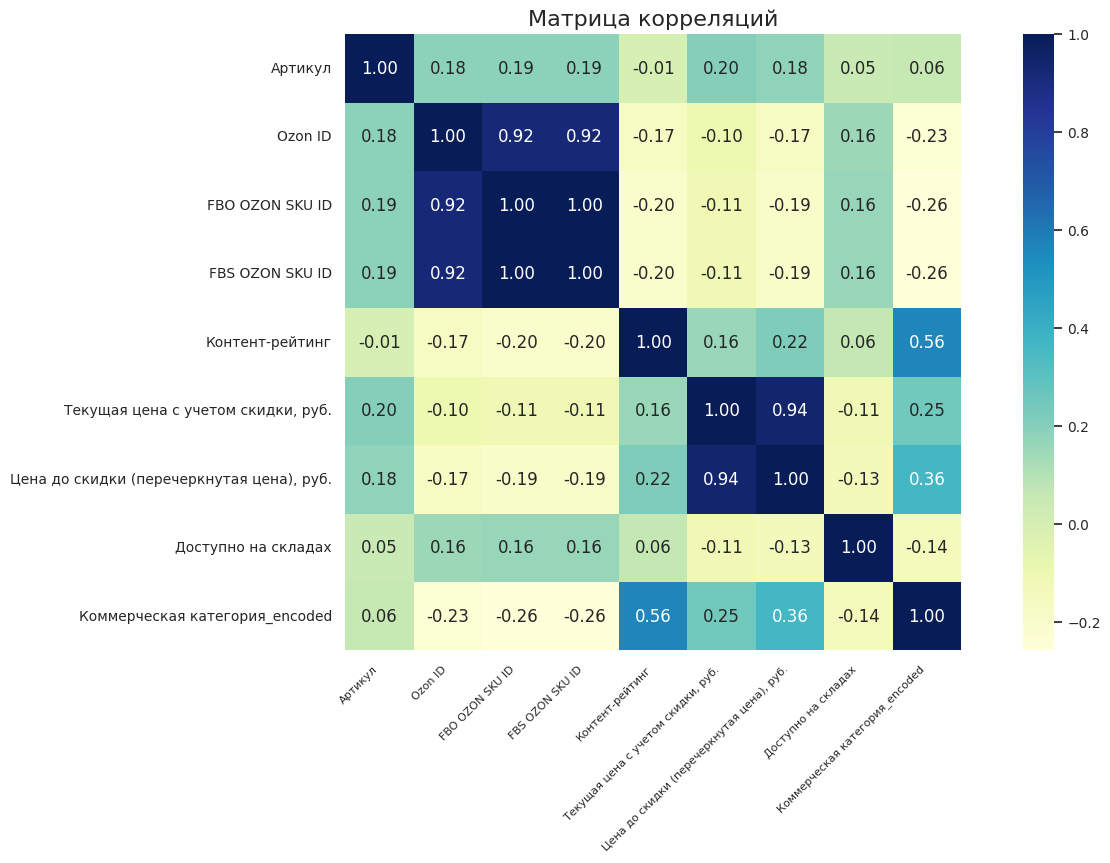

In [ ]:
plt.figure(figsize=(16, 8), dpi=100)
heatmap = sns.heatmap(data=baza1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:** Из графика видно, что существует явная зависимость между "Коммерческая категория_encoded" и  Контент-рейтинг(0,56), также "Коммерческая категория_encoded" и Цены товара (0,36). Имеется небольшая корреляция между "Контент-рейтингом" и "Ценой".  

#### **1.1.2 Работаем с файлом analysts.xlsx**

Путь к файлу: /content/gdrive/MyDrive/УИИ/Стажировка/analysts.xlsx

In [ ]:
# Загружаем базу и смотрим первые пять строк.
analysts = pd.read_excel('/content/gdrive/MyDrive/УИИ/Стажировка/analysts.xlsx')
analysts.head()

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,"Отправления с премиум-подпиской, принятые в обработку"
0,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074308,34599,2023-05-07,1,1,1,1,0,"0,00",0,0,0,0,0,0,0
1,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-04,4,0,5,0,4,"364,25",0,0,0,0,0,0,0
2,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-05,12,2,18,2,5,"6,40",0,0,0,0,0,0,0
3,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-06,4,1,4,1,2,"156,00",0,0,0,0,0,0,0
4,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-07,14,2,16,2,9,"229,78",0,0,0,0,0,0,0


In [ ]:
# Смотрим общую информацию датафрейма
analysts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254748 entries, 0 to 254747
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  254748 non-null  object
 1   Товары                                                 254748 non-null  object
 2   Модель                                                 211411 non-null  object
 3   Ozon ID                                                254748 non-null  int64 
 4   Артикул                                                254748 non-null  object
 5   День                                                   254748 non-null  object
 6   Уникальные посетители, всего                           254748 non-null  int64 
 7   Уникальные посетители с просмотром карточки товара     254748 non-null  int64 
 8   Показы, всего                               

Наши данные содержат 254748 строк и 19 столбцов. Тип данных в 6 столбцах object и в 13 столбца тип данных int64. В столбце "День" нужно изменить тип данных с object на datetime. В столбце "Артикул" стоит тип данных object, хотя скорей всего там стоят числовые значения, нужно поисследовать эти данные и при необходимости их обработать, если они нам будут нужны для решения задач в Проекте.



In [ ]:
# Найдём дубликаты
analysts.duplicated().sum()

1

In [ ]:
# Удалим дубликаты
analysts = analysts.drop_duplicates()

In [ ]:
# Посмотрим пропуски
analysts.isna().mean().sort_values(ascending=False)

Модель                                                   0.170114
Категория 3-го уровня                                    0.000000
Показы в поиске и каталоге                               0.000000
Заказано на сумму                                        0.000000
Возвращено товаров                                       0.000000
Доставлено (за выбранный период)                         0.000000
Отменено товаров                                         0.000000
Заказано товаров                                         0.000000
В корзину, всего                                         0.000000
Позиция в поиске и каталоге                              0.000000
Показы на карточке товара                                0.000000
Товары                                                   0.000000
Показы, всего                                            0.000000
Уникальные посетители с просмотром карточки товара       0.000000
Уникальные посетители, всего                             0.000000
День      

##### **Предобработка и EDA**

Удалим столбец `Отправления с премиум-подпиской, принятые в обработку`:

In [ ]:
analysts.drop('Отправления с премиум-подпиской, принятые в обработку', axis=1, inplace=True)

Преобразуем столбец `День`:

In [ ]:
# Изменим тип данных с object на Дату
analysts['День'] = pd.to_datetime(analysts['День'],format='%Y.%m.%d')

In [ ]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", analysts['День'].min())
print("Максимальная дата создания:", analysts['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


Преобразуем столбец `Позиция в поиске и каталоге`:

In [ ]:
#Заменим запятую на точку в числовых значениях  столбца "Позиция в поиске и каталоге", воспользовавшись методом .replace()
analysts['Позиция в поиске и каталоге'] = analysts['Позиция в поиске и каталоге'].replace(',', '.', regex=True)
# Изменим тип данных с object на float
analysts['Позиция в поиске и каталоге'] = analysts['Позиция в поиске и каталоге'].astype(float)

Исследуем столбец ``Артикул``. Смущает, что в столбце на первый взгляд стоят числа, но тип данных object.

In [ ]:
# Посмотрим какие уникальные значения в столбце
unique_values = analysts['Артикул'].unique()
print(unique_values)

['34599' '34601' '34597' '34598' '34218' '34219' '30932' '34538' '34539'
 '34536' '33640' '33614' '33632' '33914' '30399' '31302' '30985' '33639'
 '30401' '33635' '30986' '31094' '29885' '33638' '30275' '30400' '33618'
 '34414' '34227' '33756' '33786' '30914' '30915' '30265' '30266' '30261'
 '29189' '28935' '26552' '29193' '28166' '29187' '28936' '28999' '29184'
 '30267' '28939' '26176' '26178' '28114' '28926' '26175' '29154' '28928'
 '28937' '28933' '29186' '28924' '28115' '29442' '26562' '24793' '30260'
 '26551' '29444' '28938' '29446' '30268' '29185' '30262' '29443' '28930'
 '30263' '28929' '29190' '30271' '33782' '34205' '28934' '34206' '30270'
 '34281' '34203' '33792' '34221' '30936' '34207' '30933' '30269' '34204'
 '33793' '34224' '33819' '34220' '30937' '33810' '33784' '33787' '30931'
 '33791' '34222' '30934' '33962' '33961' '34193' '28722' '28849' '25625'
 '25624' '28870' '26824' '28182' '26964' '26925' '25626' '34216' '34158'
 '34153' '34156' '34157' '34154' '34155' '34159' '3

Мы видим, что есть записи :числа с латинскими буквами: FL10NS,FL25W и т.д. Создадим отдельный датафрейм `object_values`, в который запишем такие данные:

In [ ]:
# В этом коде мы используем метод .str.contains(), чтобы проверить наличие комбинации чисел и букв в каждой ячейке столбца analysts['Артикул'].
# Параметр regex=True указывает использовать регулярное выражение в поиске, а na=False отбрасывает пропущенные значения.
# Регулярное выражение r'\d.*[a-zA-Z]|[a-zA-Z].*\d' ищет комбинацию числа и буквы в строке.
# Если такая комбинация обнаружена, соответствующая строка будет включена в результат.
object_values = analysts[analysts['Артикул'].str.contains(r'\d.*[a-zA-Z]|[a-zA-Z].*\d', regex=True, na=False)]


In [ ]:
# Посмотрим на сводную информацию о наборе данных
object_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 252191 to 253300
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Категория 3-го уровня                               119 non-null    object        
 1   Товары                                              119 non-null    object        
 2   Модель                                              119 non-null    object        
 3   Ozon ID                                             119 non-null    int64         
 4   Артикул                                             119 non-null    object        
 5   День                                                119 non-null    datetime64[ns]
 6   Уникальные посетители, всего                        119 non-null    int64         
 7   Уникальные посетители с просмотром карточки товара  119 non-null    int64         
 8   По

У нас отсортировалось 119 записей. Доля таких данных составляет 0,05% (119/254748*100=0,05%)

In [ ]:
# Посмотрим уникальные артикулы в столбце "Артикул"
unique_artikul = object_values['Артикул'].unique()
print(unique_artikul)

['FL25W' 'FL10VW' 'FL10NS' '2A50']


Получилось , что 4 артикула имеют в оформлении цифры и латинские буквы в 119 строках. Теперь найдём долю этих артикулов в общем числе уникальных артикулов.

In [ ]:
# Посчитаем количество уникальных аритикулов в датафрейме analysts
analysts['Артикул'].nunique()

994

Таким образом доля артикулов 'FL25W', 'FL10VW', 'FL10NS', '2A50' в общем датафрейме analysts составляет: 0,4% (119/994*100).  
 Для чистоты эксперимента будет лучше удалить эти аномальные данные, для того, чтобы тип данных столбца `Артикул` изменить с object на целочисленный.

In [ ]:
# Используем метод drop(), передаем индексы этих строк в index=object_values.index,
# чтобы удалить соответствующие строки из исходного датафрейма analysts.

analysts = analysts.drop(index=object_values.index)
analysts['Артикул'] = analysts['Артикул'].astype(int)

In [ ]:
# Посмотрим на сводную информацию о наборе данных
analysts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254628 entries, 0 to 254747
Data columns (total 18 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               254628 non-null  object        
 1   Товары                                              254628 non-null  object        
 2   Модель                                              211292 non-null  object        
 3   Ozon ID                                             254628 non-null  int64         
 4   Артикул                                             254628 non-null  int64         
 5   День                                                254628 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        254628 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  254628 non-null  int64         

Все получилось! Мы преобразовали типы данных в столбцах `День`, `Позиция в поиске и каталоге`и в  `Артикул`.

**Выполним исследовательский анализ данных(EDA)**

EDA мы будем проводить в направлении поиска корреляций в данных.  Поэтому при необходимости будем выполнять дополнительные преобразования: добавлять столбцы с новыми расчётами, удалять лишние столбцы и пр.  
Начнём с описательной статистики:

In [ ]:
analysts.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozon ID,254628.0,5.455757e+08,8.741163e+07,260902271.0,510662709.0,5.115731e+08,5.784897e+08,966074308.0
Артикул,254628.0,2.771564e+04,7.967049e+03,139.0,26788.0,2.973800e+04,3.097600e+04,34601.0
"Уникальные посетители, всего",254628.0,4.966025e+01,2.202782e+02,0.0,4.0,1.000000e+01,3.000000e+01,12798.0
Уникальные посетители с просмотром карточки товара,254628.0,1.861653e+00,9.181210e+00,0.0,0.0,0.000000e+00,1.000000e+00,838.0
"Показы, всего",254628.0,8.791001e+01,4.162419e+02,0.0,5.0,1.400000e+01,4.700000e+01,20098.0
Показы на карточке товара,254628.0,2.924867e+00,1.587694e+01,0.0,0.0,0.000000e+00,1.000000e+00,1665.0
Показы в поиске и каталоге,254628.0,2.876400e+01,1.468513e+02,0.0,2.0,6.000000e+00,2.000000e+01,10774.0
Позиция в поиске и каталоге,254628.0,1.329888e+02,1.834617e+02,0.0,31.0,8.696000e+01,1.677500e+02,4584.0
"В корзину, всего",254628.0,2.144030e-01,1.136372e+00,0.0,0.0,0.000000e+00,0.000000e+00,106.0
Заказано товаров,254628.0,3.701871e-02,2.730429e-01,0.0,0.0,0.000000e+00,0.000000e+00,20.0


Выполним доп.вычисления: посмотрим суммы по столбцам `Заказано товаров`и `Отменено товаров`

In [ ]:
print("Сумма по столбцу 'Заказано товаров':", analysts['Заказано товаров'].sum())
print("Сумма по столбцу 'Отменено товаров':", analysts['Отменено товаров'].sum())

Сумма по столбцу 'Заказано товаров': 9426
Сумма по столбцу 'Отменено товаров': 480


Доля отменённых товаров по независимым причинам составила 5,1%

In [ ]:
# Найдём уникальные категорий товаров в наших данных:
unique_categories = analysts['Категория 3-го уровня'].unique()
print(unique_categories)

['Лампа автомобильная' 'Комплектующие светодиодной лампы для авто'
 'Комплектующие для ксеноновых фар' 'Разное автопринадлежности'
 'Фара автомобильная' 'Фонарь задний для авто' 'Другое'
 'Автохимия - Герметик, клей' 'Светодиодный модуль']


**Построим матрицу корреляций и отобразим её**  

Сначала преобразуем категориальные значения столбца `Категория 3-го уровня` в числовые, выполним преобразования в копии датафрейма analysts:

In [ ]:
label_encoder = LabelEncoder()
analysts1 = analysts.copy()
analysts1['Категория 3-го уровня_encoded'] = label_encoder.fit_transform(analysts1['Категория 3-го уровня'])
unique_categories_encoded = analysts1['Категория 3-го уровня_encoded'].unique()
print(unique_categories_encoded)

[4 3 2 5 7 8 1 0 6]


Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:  

In [ ]:
unique_categories_encoded = analysts1['Категория 3-го уровня'].unique()
encoded_categories = label_encoder.transform(unique_categories_encoded)

for category, encoded_category in zip(unique_categories_encoded, encoded_categories):
    print(f'{category}: {encoded_category}')

Лампа автомобильная: 4
Комплектующие светодиодной лампы для авто: 3
Комплектующие для ксеноновых фар: 2
Разное автопринадлежности: 5
Фара автомобильная: 7
Фонарь задний для авто: 8
Другое: 1
Автохимия - Герметик, клей: 0
Светодиодный модуль: 6


**Построим матрицу корреляций и отобразим её**

<ipython-input-49-1d58a1981919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=analysts1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


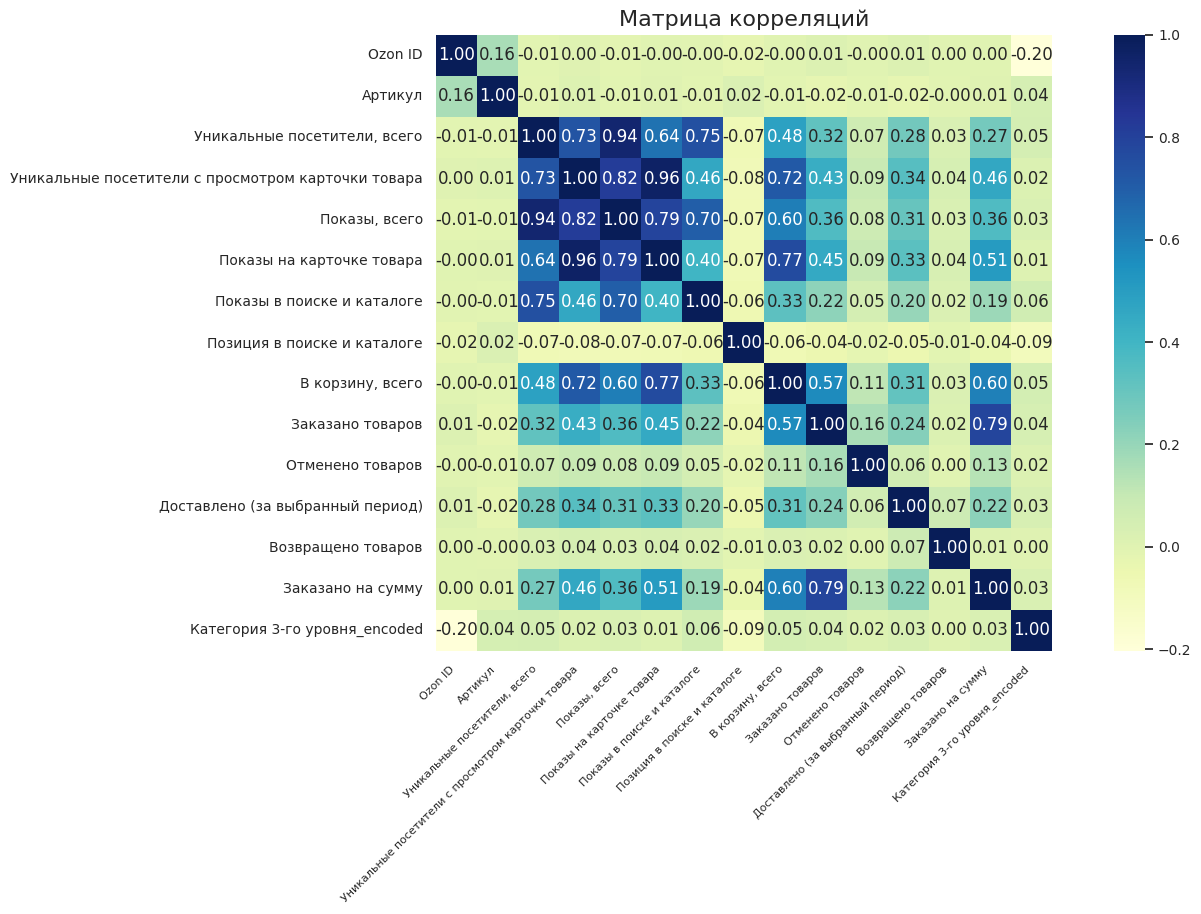

In [ ]:
plt.figure(figsize=(16, 8), dpi=100)
heatmap = sns.heatmap(data=analysts1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:**

Явной зависимости категорий от признаков не обнаружено.Есть сильная зависимость прохождения товаров по воронке продаж.

**Вывод:**

В этом разделе я:  
1.  Выполнила преобразование типы данных в столбцах День, Позиция в поиске и каталоге и в Артикул.;   
2. Для чистоты эксперимента удалила строки с  артикулами 'FL25W', 'FL10VW', 'FL10NS', '2A50' Их доля составляет менее 0,4% в общем датафрейме analysts ;  
3. Выполнила исследовательский анализ данных(EDA);  
4. Преобразовала столбец 'Категория 3-го уровня' в числовой формат для построения Модели обучения;  
5. Построила общую матрицу корреляции и отдельно для каждой категории;  
6. Обнаружила пять мультиколлинеарных признака:   
- Уникальные посетители - Показы,всего(0,94);  
- Уникальные посетители с просмотром карточки товара - Показы на карточке товара(0,96);  
- Показы всего - Уникальные посетители с просмотром карточки товара (0,82);  
- Заказано на сумму - Заказано товаров (0,79);  
- Заказано товаров - В корзину всего (0,57);  
7. Пришла к выводу, но не очень уверена,что для построения Модели прогнозирования нужно удалить эти пять мультиколлинеарных признака.  

#### **1.1.3 Работаем с файлом Аналитика Акции 01.06.2022-31.05.2023.xlsx"** здесь звучит как **promotions**

Путь к файлу : /content/gdrive/MyDrive/УИИ/Стажировка/promotions.xlsx

In [ ]:
# Загружаем базу и смотрим первые пять строк.
promotions = pd.read_excel('/content/gdrive/MyDrive/УИИ/Стажировка/promotions.xlsx')
promotions.head()

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,Акции,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Доставлено (за выбранный период),Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции,"Отправления с премиум-подпиской, принятые в обработку"
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-05,65,3,69,3,40,"110,33",0,0,0,0,0,0,0
1,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-06,85,3,109,3,46,"103,43",0,0,0,0,0,0,0
2,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-07,44,2,50,2,37,"97,14",0,0,0,0,0,0,0
3,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-08,47,1,54,2,47,"115,06",0,0,0,0,0,0,0
4,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-09,27,2,39,4,30,"114,37",0,0,0,0,0,0,0


In [ ]:
# Посмотрим на сводную информацию о наборе данных
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  239957 non-null  object
 1   Товары                                                 239957 non-null  object
 2   Модель                                                 200817 non-null  object
 3   Ozon ID                                                239957 non-null  int64 
 4   Артикул                                                239957 non-null  int64 
 5   Акции                                                  35605 non-null   object
 6   День                                                   239957 non-null  object
 7   Уникальные посетители, всего                           239957 non-null  int64 
 8   Уникальные посетители с просмотром карточки 

In [ ]:
#Смотрим доли пропусков в столбцах
promotions.isna().mean().sort_values(ascending=False)

Акции                                                    0.851619
Модель                                                   0.163113
Категория 3-го уровня                                    0.000000
Показы в поиске и каталоге                               0.000000
Заказано на сумму по акции                               0.000000
Заказано товаров по акции                                0.000000
Заказано на сумму                                        0.000000
Доставлено (за выбранный период)                         0.000000
Заказано товаров                                         0.000000
В корзину, всего                                         0.000000
Позиция в поиске и каталоге                              0.000000
Показы на карточке товара                                0.000000
Товары                                                   0.000000
Показы, всего                                            0.000000
Уникальные посетители с просмотром карточки товара       0.000000
Уникальные

**Вывод:** Наши данные содержат 239957 строк и 20 столбцов. Тип данных в 6 столбцах object и в 14 столбца тип данных int64. В столбце "День" нужно изменить тип данных с object на datetime. Также следует преобразовать  и изменить тип данных в столбце "Позиция в поиске и каталоге" с object на вещественный.

##### **Предобработка и EDA**

In [ ]:
# Изменим тип данных с object на Дату
promotions['День'] = pd.to_datetime(promotions['День'],format='%Y.%m.%d')

In [ ]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", promotions['День'].min())
print("Максимальная дата создания:", promotions['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


In [ ]:
#Заменим запятую на точку в числовых значениях  столбца "Позиция в поиске и каталоге", воспользовавшись методом .replace()
promotions['Позиция в поиске и каталоге'] = promotions['Позиция в поиске и каталоге'].replace(',', '.', regex=True)
# Изменим тип данных с object на float
promotions['Позиция в поиске и каталоге'] = promotions['Позиция в поиске и каталоге'].astype(float)

In [ ]:
# Посмотрим на сводную информацию о наборе данных после преобразований
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Категория 3-го уровня                                  239957 non-null  object        
 1   Товары                                                 239957 non-null  object        
 2   Модель                                                 200817 non-null  object        
 3   Ozon ID                                                239957 non-null  int64         
 4   Артикул                                                239957 non-null  int64         
 5   Акции                                                  35605 non-null   object        
 6   День                                                   239957 non-null  datetime64[ns]
 7   Уникальные посетители, всего                           2

### **1.2 Соединяем данные з-х датафреймов: promotions,analysts и baza**

Посмотрим на сводную информацию о наборе данных:

In [ ]:
baza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1221 non-null   int64  
 1   Ozon ID                                    1221 non-null   int64  
 2   FBO OZON SKU ID                            1221 non-null   int64  
 3   FBS OZON SKU ID                            1221 non-null   int64  
 4   Наименование товара                        1221 non-null   object 
 5   Контент-рейтинг                            1221 non-null   float64
 6   Бренд                                      1221 non-null   object 
 7   Коммерческая категория                     1221 non-null   object 
 8   Текущая цена с учетом скидки, руб.         1221 non-null   float64
 9   Цена до скидки (перечеркнутая цена), руб.  1221 non-null   float64
 10  Доступно на складах     

In [ ]:
analysts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254628 entries, 0 to 254747
Data columns (total 18 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               254628 non-null  object        
 1   Товары                                              254628 non-null  object        
 2   Модель                                              211292 non-null  object        
 3   Ozon ID                                             254628 non-null  int64         
 4   Артикул                                             254628 non-null  int64         
 5   День                                                254628 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        254628 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  254628 non-null  int64         

In [ ]:
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Категория 3-го уровня                                  239957 non-null  object        
 1   Товары                                                 239957 non-null  object        
 2   Модель                                                 200817 non-null  object        
 3   Ozon ID                                                239957 non-null  int64         
 4   Артикул                                                239957 non-null  int64         
 5   Акции                                                  35605 non-null   object        
 6   День                                                   239957 non-null  datetime64[ns]
 7   Уникальные посетители, всего                           2

In [ ]:
baza.head(1)

,Артикул,Ozon ID,FBO OZON SKU ID,FBS OZON SKU ID,Наименование товара,Контент-рейтинг,Бренд,Коммерческая категория,"Текущая цена с учетом скидки, руб.","Цена до скидки (перечеркнутая цена), руб.",Доступно на складах
0,30273,105606938,298131117,298131122,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,15.0,GNX,Фонарь задний для авто,1200.0,1800.0,26


In [ ]:
analysts.head(1)

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму
0,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074308,34599,2023-05-07,1,1,1,1,0,0.0,0,0,0,0,0,0


In [ ]:
promotions.head(1)

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,Акции,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Доставлено (за выбранный период),Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции,"Отправления с премиум-подпиской, принятые в обработку"
0,Разное автопринадлежности,Светодиодная подсветка салона,Светодиодная подсветка салона,882353427,34414,NaN,2023-03-05,65,3,69,3,40,110.33,0,0,0,0,0,0,0


##### **1.2.1 Объединим два датафрейма- analysts, promotions**

In [ ]:
analysts_promotions = pd.merge(analysts, promotions[['Артикул', 'День', 'Акции',
                                                     'Заказано товаров по акции','Заказано на сумму по акции']
                                                    ], on=['Артикул', 'День'], how='inner')

In [ ]:
# Посмотрим на сводную информацию о наборе данных
analysts_promotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245210 entries, 0 to 245209
Data columns (total 21 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               245210 non-null  object        
 1   Товары                                              245210 non-null  object        
 2   Модель                                              205080 non-null  object        
 3   Ozon ID                                             245210 non-null  int64         
 4   Артикул                                             245210 non-null  int64         
 5   День                                                245210 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        245210 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  245210 non-null  int64         

In [ ]:
#Посмотрим долю пропусков
analysts_promotions.isna().mean().sort_values(ascending=False)

Акции                                                 0.852502
Модель                                                0.163656
Категория 3-го уровня                                 0.000000
Позиция в поиске и каталоге                           0.000000
Заказано товаров по акции                             0.000000
Заказано на сумму                                     0.000000
Возвращено товаров                                    0.000000
Доставлено (за выбранный период)                      0.000000
Отменено товаров                                      0.000000
Заказано товаров                                      0.000000
В корзину, всего                                      0.000000
Показы в поиске и каталоге                            0.000000
Товары                                                0.000000
Показы на карточке товара                             0.000000
Показы, всего                                         0.000000
Уникальные посетители с просмотром карточки товара    0

##### **1.2.2 Объединим два датафрейма- baza и analysts_promotions**

In [ ]:
baza_analysts_promotions = pd.merge(analysts_promotions, baza[['Цена до скидки (перечеркнутая цена), руб.',
                                                               'Контент-рейтинг',
                                                               'Текущая цена с учетом скидки, руб.',
                                                               'Артикул']], on=['Артикул'], how='inner')

In [ ]:
baza_analysts_promotions.head()

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,Акции,Заказано товаров по акции,Заказано на сумму по акции,"Цена до скидки (перечеркнутая цена), руб.",Контент-рейтинг,"Текущая цена с учетом скидки, руб."
0,Лампа автомобильная,Светодиодные лампы GNX NEON 9012 HIR2 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966018019,34601,2023-05-04,4,1,7,3,3,516.67,0,0,0,0,0,0,NaN,0,0,3875.0,35.0,1640.0
1,Лампа автомобильная,Светодиодные лампы GNX NEON 9012 HIR2 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966018019,34601,2023-05-05,8,1,11,2,3,5.67,0,0,0,0,0,0,NaN,0,0,3875.0,35.0,1640.0
2,Лампа автомобильная,Светодиодные лампы GNX NEON 9012 HIR2 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966018019,34601,2023-05-06,6,2,15,6,4,147.00,1,0,0,0,0,0,NaN,0,0,3875.0,35.0,1640.0
3,Лампа автомобильная,Светодиодные лампы GNX NEON 9012 HIR2 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966018019,34601,2023-05-07,7,0,8,0,6,40.00,0,0,0,0,0,0,NaN,0,0,3875.0,35.0,1640.0
4,Лампа автомобильная,Светодиодные лампы GNX NEON 9012 HIR2 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966018019,34601,2023-05-08,55,0,70,0,15,34.40,0,0,0,0,0,0,NaN,0,0,3875.0,35.0,1640.0


In [ ]:
#Посмотрим на сводную информацию о наборе данных после преобразований
baza_analysts_promotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236685 entries, 0 to 236684
Data columns (total 24 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               236685 non-null  object        
 1   Товары                                              236685 non-null  object        
 2   Модель                                              198860 non-null  object        
 3   Ozon ID                                             236685 non-null  int64         
 4   Артикул                                             236685 non-null  int64         
 5   День                                                236685 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        236685 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  236685 non-null  int64         

### **1.3 Построим матрицу корреляций для датафрейма baza_analysts_promotions и отобразим её**

Сначала преобразуем категориальные значения столбца "Категория 3-го уровня" в числовые, выполним преобразования в  датафрейме baza_analysts_promotions:

In [ ]:
unique_categories_encoded = baza_analysts_promotions['Категория 3-го уровня'].unique()
unique_categories_encoded

array(['Лампа автомобильная', 'Комплектующие светодиодной лампы для авто',
       'Комплектующие для ксеноновых фар', 'Разное автопринадлежности',
       'Фара автомобильная', 'Другое', 'Автохимия - Герметик, клей',
       'Фонарь задний для авто'], dtype=object)

Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:

In [ ]:
# Обучаем LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(baza_analysts_promotions['Категория 3-го уровня'])

# Преобразуем значения с использованием LabelEncoder с параметром handle_unknown='ignore'
baza_analysts_promotions['Категория 3-го уровня_encoded'] = label_encoder.transform(baza_analysts_promotions['Категория 3-го уровня'])

# Выводим значения категорий и их преобразованные номера
encoded_categories = baza_analysts_promotions['Категория 3-го уровня_encoded'].unique()
for encoded_category in encoded_categories:
    category = baza_analysts_promotions[baza_analysts_promotions['Категория 3-го уровня_encoded'] == encoded_category]['Категория 3-го уровня'].iloc[0]
    print(f'{category}: {encoded_category}')

Лампа автомобильная: 4
Комплектующие светодиодной лампы для авто: 3
Комплектующие для ксеноновых фар: 2
Разное автопринадлежности: 5
Фара автомобильная: 6
Другое: 1
Автохимия - Герметик, клей: 0
Фонарь задний для авто: 7


Теперь преобразуем данные столбца "Акции":

In [ ]:
#Посмотрим на уникальные значения
unique_action_encoded = baza_analysts_promotions['Акции'].unique()
unique_action_encoded

array([nan, 'Хиты. О!Распродажа',
       'Cкидки на товары для дачи и активных выходных от 10%',
       'СуперХиты. Звездная распродажа ', 'Хиты. Звездная распродажа ',
       'Cкидки на товары для дачи и активных выходных от 10%, Хиты. О!Распродажа',
       'Хиты мая', 'Хиты. Звездная распродажа , Хиты мая',
       'Хиты Мая. Скидка на комиссию -5% (2)',
       'Хиты Мая. Скидка на комиссию -5% (2), Хиты. О!Распродажа',
       'Хиты марта ', 'Скидка для автолюбителей Апрель 2023',
       'Скидка для автолюбителей Апрель 2023, Хиты. Звездная распродажа ',
       'Хиты мая, Хиты. Звездная распродажа ',
       'Cкидки на товары для дачи и активных выходных от 10%, Хиты мая',
       'СуперХиты. Звездная распродажа , Хиты. Звездная распродажа ',
       'Хиты мая, Хиты Мая. Скидка на комиссию -5% (2)',
       'Хиты мая, Хиты. О!Распродажа',
       'СуперХиты. Звездная распродажа , Хиты Мая. Скидка на комиссию -5% (2)',
       'Хиты. О!Распродажа, Cкидки на товары для дачи и активных выходны

Мы види , что в данных стоят значения с nan, будем избавляться от nan

In [ ]:
# посмотрим, как соотносятся классы для нашего набора данных
baza_analysts_promotions['Акции'].value_counts()

Хиты. Звездная распродажа                                                                     14731
Cкидки на товары для дачи и активных выходных от 10%                                           6464
Хиты. Черная пятница                                                                           4491
Хиты мая                                                                                       2975
Хиты. О!Распродажа                                                                             2072
Хиты Мая. Скидка на комиссию -5% (2)                                                           1597
Хиты марта                                                                                     1457
Хиты марта. скидка на комиссию -5% (2)                                                          475
СуперХиты. Звездная распродажа                                                                  217
Хиты мая, Хиты Мая. Скидка на комиссию -5% (2)                                                  149


In [ ]:
# Заменим все nan в столбце 'Акции' на 'Unknown'
baza_analysts_promotions['Акции'] = baza_analysts_promotions['Акции'].fillna('Unknown')

Преобразуем категориальные значения столбца "Акции" в числовые, выполним преобразования в датафрейме baza_analysts_promotions:

In [ ]:
# Обучаем LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(baza_analysts_promotions['Акции'])

# Преобразуем значения с использованием LabelEncoder с параметром handle_unknown='ignore'
baza_analysts_promotions['Акции_encoded'] = label_encoder.transform(baza_analysts_promotions['Акции'])

# Выводим значения категорий и их преобразованные номера
encoded_actions = baza_analysts_promotions['Акции_encoded'].unique()
for encoded_action in encoded_actions:
    action = baza_analysts_promotions[baza_analysts_promotions['Акции_encoded'] == encoded_action]['Акции'].iloc[0]
    print(f'{action}: {encoded_action}')

Unknown: 4
Хиты. О!Распродажа: 44
Cкидки на товары для дачи и активных выходных от 10%: 0
СуперХиты. Звездная распродажа : 9
Хиты. Звездная распродажа : 34
Cкидки на товары для дачи и активных выходных от 10%, Хиты. О!Распродажа: 3
Хиты мая: 26
Хиты. Звездная распродажа , Хиты мая: 41
Хиты Мая. Скидка на комиссию -5% (2): 16
Хиты Мая. Скидка на комиссию -5% (2), Хиты. О!Распродажа: 18
Хиты марта : 19
Скидка для автолюбителей Апрель 2023: 5
Скидка для автолюбителей Апрель 2023, Хиты. Звездная распродажа : 8
Хиты мая, Хиты. Звездная распродажа : 32
Cкидки на товары для дачи и активных выходных от 10%, Хиты мая: 1
СуперХиты. Звездная распродажа , Хиты. Звездная распродажа : 14
Хиты мая, Хиты Мая. Скидка на комиссию -5% (2): 29
Хиты мая, Хиты. О!Распродажа: 33
СуперХиты. Звездная распродажа , Хиты Мая. Скидка на комиссию -5% (2): 10
Хиты. О!Распродажа, Cкидки на товары для дачи и активных выходных от 10%: 45
Хиты. Звездная распродажа , Хиты Мая. Скидка на комиссию -5% (2): 38
Хиты. Черная 

Преобразуем данные столбца "День" в int:

In [ ]:
baza_analysts_promotions['День'] = pd.to_numeric(baza_analysts_promotions['День'].astype(int))

In [ ]:
baza_analysts_promotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236685 entries, 0 to 236684
Data columns (total 26 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Категория 3-го уровня                               236685 non-null  object 
 1   Товары                                              236685 non-null  object 
 2   Модель                                              198860 non-null  object 
 3   Ozon ID                                             236685 non-null  int64  
 4   Артикул                                             236685 non-null  int64  
 5   День                                                236685 non-null  int64  
 6   Уникальные посетители, всего                        236685 non-null  int64  
 7   Уникальные посетители с просмотром карточки товара  236685 non-null  int64  
 8   Показы, всего                                       236685 non-n

**Построим матрицу корреляций и отобразим её**

<ipython-input-77-a8c410900125>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=baza_analysts_promotions.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


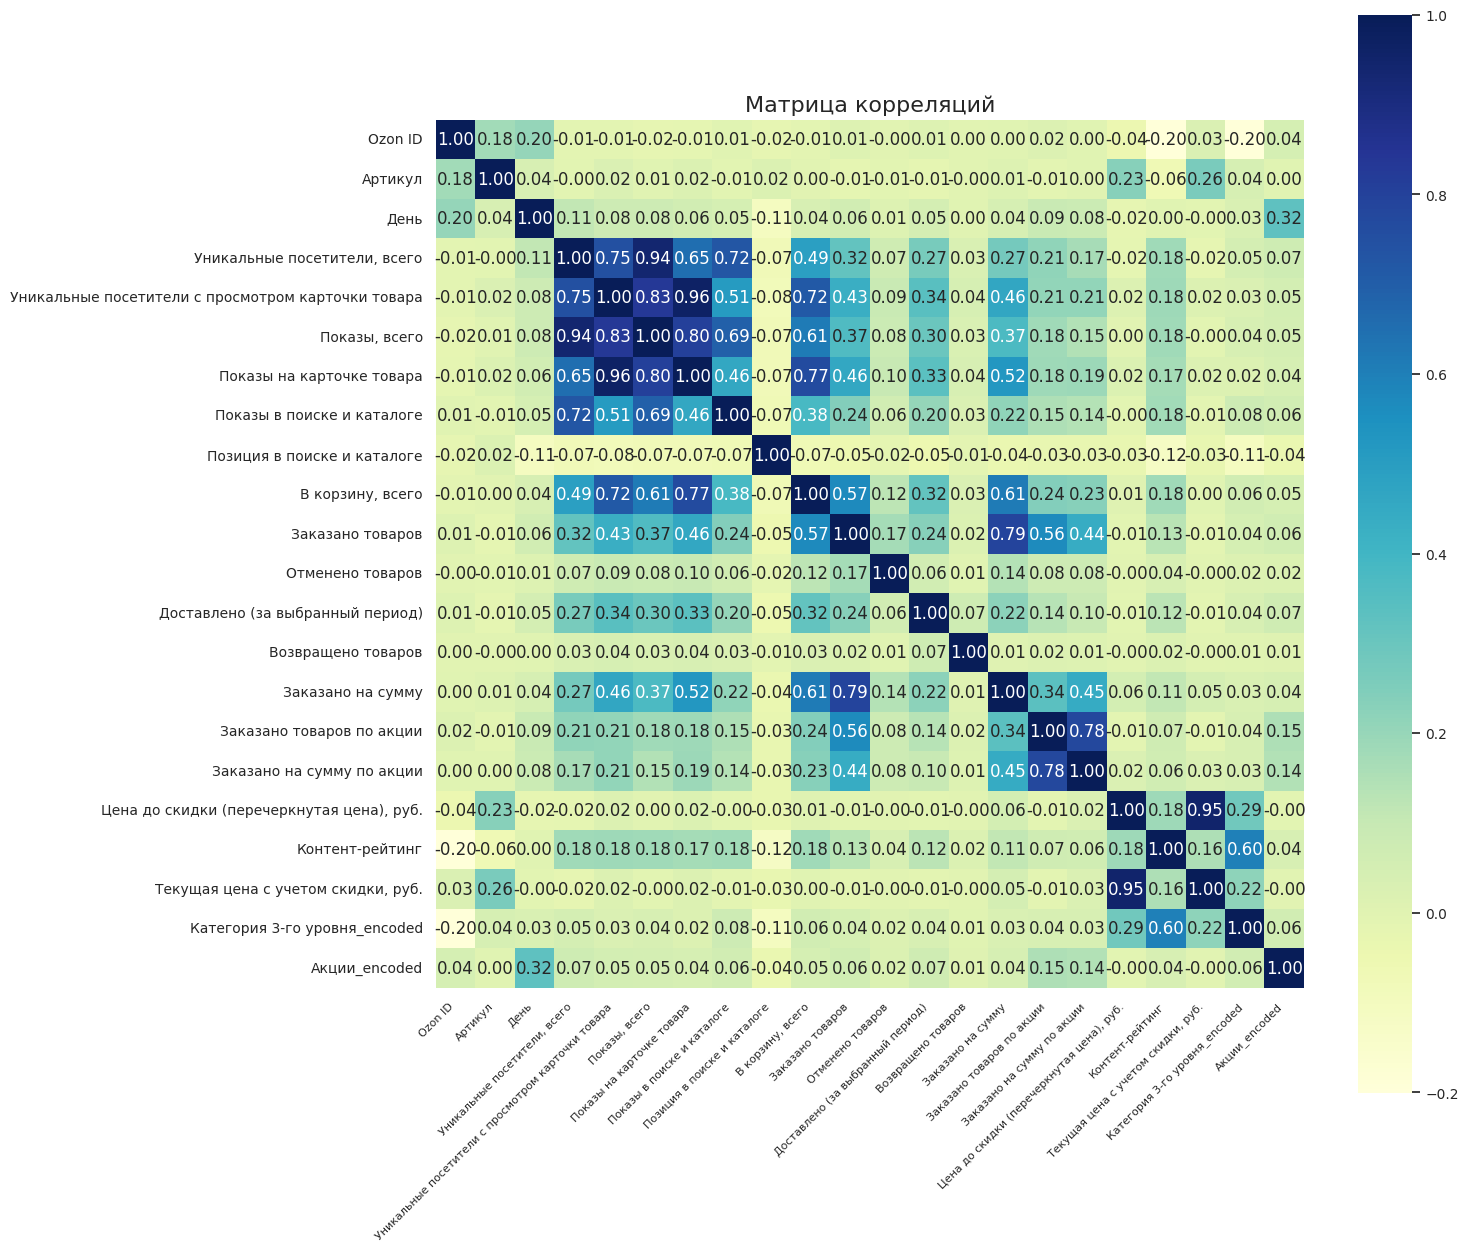

In [ ]:
plt.figure(figsize=(14, 14), dpi=100)
heatmap = sns.heatmap(data=baza_analysts_promotions.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:**

- Присутствует явная зависимость Категорий от Контент-рейтинга (0,6) и Цены товара(0,29) и (0,22).   
- Также существует явная зависимость Заказано товаров от Заказано товаров по акции(0,56) и Заказано на сумму по акции (0,44).  
- Есть сильная зависимость прохождения товаров по воронке продаж.


### **1.4 Для карточек товара лампы, лампы ксенон, фары - выявить влияние заполненности КТ на количество заказов товара.**

Посмотрим, какие уникальные данные находятся в столбце `Контент-рейтинг`:

In [ ]:
unique_baza_analysts_promotions =baza_analysts_promotions['Контент-рейтинг'].unique()
print(unique_baza_analysts_promotions)

[35.  40.  45.   0.   5.  15.  10.  30.  12.5 22.5 52.5 20.  25.   7.5
 32.5 37.5 27.5 17.5]


Переименуем столбец `Категория 3-го уровня_encoded`, чтобы в запросе query не было ошибки:

In [ ]:
baza_analysts_promotions.rename(columns={'Категория 3-го уровня_encoded': 'Категория_encoded'}, inplace=True)

#### **1.4.1 Для карточек товара категории "Лампа автомобильная", выявить влияние заполненности КТ на количество заказов товара.**

In [ ]:
# Фильтруем данные по категории автомобильные фары
auto_lamp = baza_analysts_promotions.query('Категория_encoded == 4').copy()
auto_lamp.describe()

,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции,"Цена до скидки (перечеркнутая цена), руб.",Контент-рейтинг,"Текущая цена с учетом скидки, руб.",Категория_encoded,Акции_encoded
count,8.921000e+03,8921.000000,8.921000e+03,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.000000,8921.0,8921.000000
mean,8.161232e+08,27342.037664,1.679118e+18,98.528752,2.868400,159.724358,4.274745,62.633673,83.998271,0.407578,0.119830,0.005156,0.111647,0.001906,214.678399,0.044726,55.431678,1787.305907,7.620782,1510.545455,4.0,9.534357
std,7.594556e+07,8528.407280,4.995549e+15,500.526547,7.616653,832.686164,11.680834,479.027357,141.027838,1.565464,0.649672,0.095740,0.619996,0.056987,1373.422486,0.438755,693.661489,2179.463280,15.264213,1685.378912,0.0,12.073865
min,2.609120e+08,161.000000,1.654214e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,198.000000,0.000000,198.000000,4.0,0.000000
25%,8.001840e+08,26964.000000,1.676938e+18,4.000000,0.000000,5.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,450.000000,4.0,4.000000
50%,8.443294e+08,28939.000000,1.679962e+18,11.000000,0.000000,14.000000,0.000000,5.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.000000,0.000000,900.000000,4.0,4.000000
75%,8.443342e+08,30932.000000,1.682813e+18,35.000000,2.000000,48.000000,3.000000,17.000000,97.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1890.000000,5.000000,1640.000000,4.0,4.000000
max,9.660180e+08,34601.000000,1.685491e+18,9518.000000,105.000000,17430.000000,145.000000,8430.000000,3392.440000,31.000000,18.000000,2.000000,14.000000,2.000000,26600.000000,18.000000,23760.000000,7500.000000,52.500000,6000.000000,4.0,48.000000


Проведём исследования о топ-товарах в категории 4 (автомобильные лампы):


In [ ]:
# Группировка данных по товарам и подсчет числа заказанных товаров
top_items = auto_lamp.groupby('Товары')['Заказано товаров'].sum().reset_index()

# Сортировка топ-товаров по количеству заказанных товаров
top_items = top_items.sort_values(by='Заказано товаров', ascending=False).reset_index(drop=True)

# Вывод топ-10 товаров
top_10_items = top_items.head(10)
print("Топ-10 товаров для категории 4 (автомобильные лампы):")
print(top_10_items)

Топ-10 товаров для категории 4 (автомобильные лампы):
                                             Товары  Заказано товаров
0               Лампа Osram H7 Original 64210 (1шт)               246
1  Ксеноновая лампа D1S OSRAM 66140 Original Xenarc               202
2  Ксеноновая лампа D2S OSRAM 66240 Xenarc Original               167
3  Ксеноновая лампа D4S OSRAM 66440 Xenarc Original               124
4              Лампа Osram H11 Original 64211 (1шт)                69
5       Автолампа GNX Vega W21/5W LED красная (1шт)                20
6       Автолампа GNX Vega P21W LED оранжевая (1шт)                16
7    Автолампа GNX WY21W LED оранжевая canbus (1шт)                14
8     Автолампа GNX Vega P27/7W LED оранжевая (1шт)                14
9         Автолампа GNX Vega W21W LED красная (1шт)                12


Для начала, построим график зависимости контент-рейтинга от количества заказов

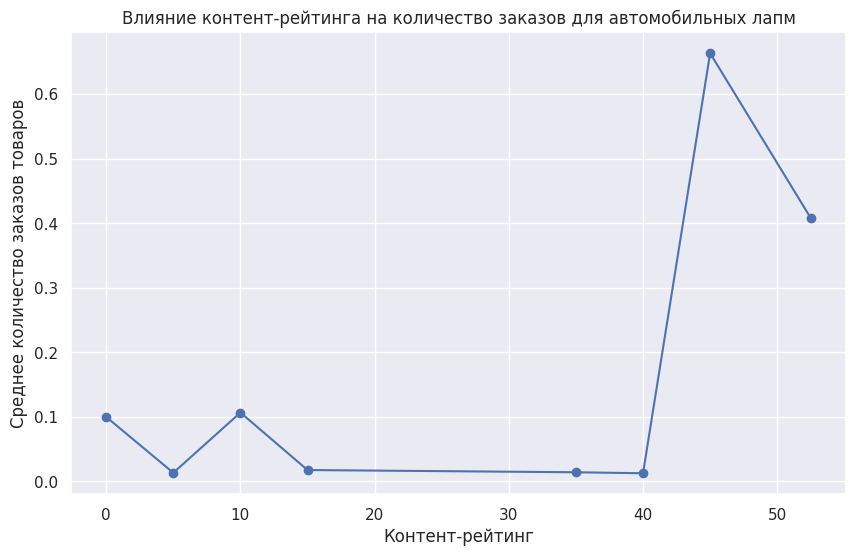

In [ ]:
# Группировка данных по контент-рейтингу и расчет среднего количества заказов товара
avg_orders_by_rating = auto_lamp.groupby('Контент-рейтинг')['Заказано товаров'].mean()

# Построение графика зависимости контент-рейтинга от количества заказов
plt.figure(figsize=(10, 6))
plt.plot(avg_orders_by_rating.index, avg_orders_by_rating.values, marker='o')
plt.xlabel('Контент-рейтинг')
plt.ylabel('Среднее количество заказов товаров')
plt.title('Влияние контент-рейтинга на количество заказов для автомобильных лапм')
plt.show()

На графике мы видим не однозначную картину: до рейтинга "40" зависимости кол-ва заказов от контент-рейтинга не наблюдается, после рейтинга "40" резкий скачок. Нужно провести доп.исследования: возможно есть выбросы и другие аномалии в данных.

**Градиентный бустинг:**  

Для выявления влияния контент-рейтинга на количество заказов товара в категории "автомобильные лампы" мы применим модель градиентного бустинга.  

Задача предсказания количества заказов является задачей регрессии, так как она предполагает непрерывные числовые значения в качестве целевой переменной.   

Когда мы имеем дело с задачей регрессии, градиентный бустинг обычно является хорошим выбором. Градиентный бустинг - это мощный ансамблевый метод, который строит последовательность деревьев решений и улучшает их путем минимизации градиента функции потерь.  
 Он может моделировать сложные нелинейные зависимости и обычно показывает хорошее качество предсказаний даже на небольших объемах данных. К тому же, градиентный бустинг обладает способностью обнаруживать важные признаки и учитывать их в моделировании.

Поэтому, на основании этой информации и из-за возможности градиентного бустинга построить хорошие прогнозы в задаче регрессии, я и предложила использовать градиентный бустинг.  


In [ ]:
# Выделение признаков и целевой переменной
features = auto_lamp[['Контент-рейтинг']]
target = auto_lamp['Заказано товаров']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2663007531505272


В результате запуска кода, получено значение среднеквадратической ошибки (MSE) равное 0.2663007531505272.

Чем ближе значение MSE к нулю, тем лучше модель способна предсказывать количество заказанных товаров на основе контент-рейтинга для категории "автомобильные лампы".

Для более полной оценки модели градиентного бустинга, будем использовать следующие метрики:  
1. Средняя абсолютная ошибка (MAE): MAE измеряет среднюю абсолютную разницу между фактическими и прогнозируемыми значениями. Чем ближе значение MAE к нулю, тем лучше модель. Можно рассчитать MAE с использованием функции mean_absolute_error из модуля sklearn.metrics.  

2. Коэффициент детерминации (R^2): R^2 измеряет долю объясненной дисперсии в целевой переменной. Значение R^2 варьируется от 0 до 1, где 1 означает идеальное соответствие прогнозируемых значений фактическим. Можно рассчитать R^2 с использованием метода score модели.  

In [ ]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Расчет и вывод MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Расчет и вывод R^2
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Absolute Error: 0.19907335498696074
R^2 Score: -0.005892087488961417


Исходя из результатов, полученных при расчете MAE и R^2, можно сделать следующие общие выводы:    

1. Средняя абсолютная ошибка (MAE) равна 0.19907335498696074. Это означает, что средняя абсолютная разница между фактическими и прогнозируемыми значениями равна 0.199. Чем меньше значение MAE, тем точнее прогнозы модели. В данном случае, полученное значение MAE достаточно низкое, что указывает на хорошую предсказательную способность модели.  

2. Коэффициент детерминации (R^2) равен -0.005892087488961417. Значение R^2 варьируется от -inf до 1, где 1 означает идеальное соответствие прогнозируемых значений фактическим. Отрицательное значение R^2 может указывать на то, что модель не объясняет дисперсию в данных и предсказания не лучше случайных гаданий.   

С учетом полученных результатов, можно сказать, что модель градиентного бустинга на основе контент-рейтинга для категории "автомобильные лампы" может предсказывать количество заказанных товаров с некоторой точностью, как указывает низкая средняя абсолютная ошибка (MAE). Однако, отрицательное значение коэффициента детерминации (R^2) указывает на то, что модель не объясняет дисперсию в данных и не лучше случайного угадывания значений.  


**Общий вывод:**  
 **В итоге, модель градиентного бустинга позволяет предсказывать количество заказов товара на основе контент-рейтинга в категории "автомобильные лампы" с хорошей точностью.**     
  **Средняя абсолютная ошибка (MAE) составляет 0.19907335498696074, а среднеквадратическая ошибка (MSE) - 0.2663007531505272.**     
  **Однако, коэффициент детерминации (R^2) равен -0.005892087488961417, что означает, что модель не объясняет дисперсию в данных и требует дальнейшего улучшения.**    
   **Рекомендуется провести более глубокий анализ данных, настроить параметры модели и, возможно, исследовать альтернативные модели машинного обучения для улучшения качества предсказаний.**   

#### **1.4.2 Для карточек товара категории "Автомобильная фара", выявить влияние заполненности КТ на количество заказов товара.**

In [ ]:
# Фильтруем данные по категории автомобильные фары
auto_fars = baza_analysts_promotions.query('Категория_encoded == 6').copy()
auto_fars.describe()

,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции,"Цена до скидки (перечеркнутая цена), руб.",Контент-рейтинг,"Текущая цена с учетом скидки, руб.",Категория_encoded,Акции_encoded
count,9.065000e+04,90650.000000,9.065000e+04,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.000000,90650.0,90650.000000
mean,5.127844e+08,28182.284545,1.670786e+18,65.207910,2.277904,108.634429,3.448582,41.024468,111.235063,0.311076,0.051693,0.003078,0.045207,0.000750,170.812686,0.018533,57.627159,8109.907402,18.090651,4658.280276,6.0,8.206111
std,5.798783e+07,4595.703006,8.732174e+15,258.158421,7.408972,417.107046,11.329578,109.145803,145.554986,1.064806,0.273480,0.061436,0.253183,0.028945,958.138558,0.170942,572.467342,4750.581281,5.654856,2640.640908,0.0,11.247418
min,2.754937e+08,343.000000,1.654042e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,15.000000,1089.000000,6.0,0.000000
25%,5.115723e+08,26789.000000,1.663546e+18,4.000000,0.000000,6.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5282.000000,15.000000,3058.000000,6.0,4.000000
50%,5.115731e+08,29140.000000,1.671062e+18,14.000000,0.000000,21.000000,0.000000,10.000000,79.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6650.000000,15.000000,3850.000000,6.0,4.000000
75%,5.226468e+08,30080.000000,1.678234e+18,44.000000,2.000000,69.000000,2.000000,32.000000,147.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9500.000000,22.500000,5500.000000,6.0,4.000000
max,8.810331e+08,34227.000000,1.685491e+18,12798.000000,261.000000,20098.000000,308.000000,4115.000000,3808.260000,22.000000,6.000000,3.000000,8.000000,2.000000,31004.000000,5.000000,31004.000000,39216.000000,45.000000,21156.000000,6.0,48.000000


Проведём исследования о топ-товарах в категории 6 (автомобильные фары):

In [ ]:
# Группировка данных по товарам и подсчет числа заказанных товаров
top_items = auto_fars.groupby('Товары')['Заказано товаров'].sum().reset_index()

# Сортировка топ-товаров по количеству заказанных товаров
top_items = top_items.sort_values(by='Заказано товаров', ascending=False).reset_index(drop=True)

# Вывод топ-10 товаров
top_10_items = top_items.head(10)
print("Топ-10 товаров для категории 6 (автомобильные фары):")
print(top_10_items)

Топ-10 товаров для категории 6 (автомобильные фары):
                                              Товары  Заказано товаров
0  Биксеноновая линза GNX Hella 3R Crystal Vision...               356
1  Стекла фар Mazda 3 BK седан 2003-2009, комплек...               177
2                 Линзы для фар GNX Hella 3R H7, D2S               155
3  Стекло фары Mazda 6 GH (2007 - 2012), левое, G...               146
4  Стекло фары Mazda 6 GH (2007 - 2012), правое, ...               142
5  Стекла на фары Toyota Camry V40 2006-2009, ком...               114
6  Стекла для фар Volkswagen Passat B5 1996-2000,...               108
7  Стекло фары Ford Focus 2 2008-2010, левое, GNX...               102
8  Стекло фары Mazda 3 BK седан (2003 - 2009 г.в....                90
9  Стекло фары Mazda 3 BK седан (2003 - 2009 г.в....                78


Для начала, построим график зависимости контент-рейтинга от количества заказов

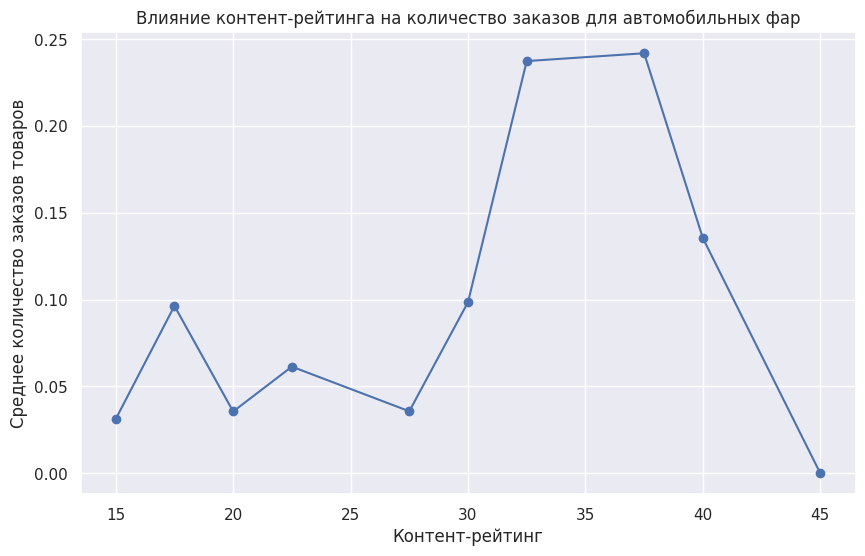

In [ ]:
# Группировка данных по контент-рейтингу и расчет среднего количества заказов товара
avg_orders_by_rating = auto_fars.groupby('Контент-рейтинг')['Заказано товаров'].mean()

# Построение графика зависимости контент-рейтинга от количества заказов
plt.figure(figsize=(10, 6))
plt.plot(avg_orders_by_rating.index, avg_orders_by_rating.values, marker='o')
plt.xlabel('Контент-рейтинг')
plt.ylabel('Среднее количество заказов товаров')
plt.title('Влияние контент-рейтинга на количество заказов для автомобильных фар')
plt.show()

На графике мы видим не однозначную картину: существует зависимость числа рейтинга на рост заказов. Но для контент-рейтинга с числом "45" количество заказов обнуляется. Нужно провести доп.исследования: возможно есть выбросы и другие аномалии.

Продолжим наше исследование и построим градиентный бустинг:  

In [ ]:
# Выделение признаков и целевой переменной
features = auto_fars[['Контент-рейтинг']]
target = auto_fars['Заказано товаров']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06997570382980053


Результаты модели показывают среднеквадратическую ошибку (MSE) равную 0.06997570382980053. Чем ближе значение MSE к нулю, тем лучше модель способна предсказывать количество заказов товара.

Таким образом, наша модель градиентного бустинга демонстрирует хорошие результаты для предсказания количества заказов товара в 6-й категории. Ошибки модели достаточно низкие, что указывает на хорошую точность предсказаний.  
 Найдем MAE и коэффициент детерминации R^2:  

In [ ]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Расчет и вывод MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Расчет и вывод R^2
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Absolute Error: 0.09511900190751414
R^2 Score: 0.03845511493957099


MAE составила 0.09511900190751414 и показывает среднюю абсолютную разницу между фактическими и прогнозируемыми значениями. Более низкое значение MAE указывает на более точные прогнозы модели.

Коэффициент детерминации (R^2) равен 0.03845511493957099. Значение R^2 варьируется от 0 до 1, где значение ближе к 1 указывает на лучшее соответствие прогнозируемых значений фактическим. Полученное значение R^2 говорит о том, что модель не достаточно хорошо объясняет дисперсию в данных и прогнозы не лучше случайных гаданий.  

**Вывод:**  
 **Таким образом, модель градиентного бустинга в данном случае показывает некоторую способность предсказывать количество заказов товаров в 6-й категории, но она требует дальнейшего улучшения для более точных прогнозов.**    

#### **1.4.3 Для карточек товара категории "Комплектующие для ксеноновых фар", выявить влияние заполненности КТ на количество заказов товара.**

In [ ]:
# Фильтруем данные по категории Комплектующие для ксеноновых фар
auto_xenon = baza_analysts_promotions.query('Категория_encoded == 2').copy()
auto_xenon.describe()

,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,Заказано товаров по акции,Заказано на сумму по акции,"Цена до скидки (перечеркнутая цена), руб.",Контент-рейтинг,"Текущая цена с учетом скидки, руб.",Категория_encoded,Акции_encoded
count,1.354370e+05,135437.000000,1.354370e+05,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.000000,135437.0,135437.000000
mean,5.506961e+08,27619.627244,1.670293e+18,40.292010,1.743866,76.005464,2.828776,19.474014,152.447334,0.160414,0.024292,0.001078,0.023000,0.000458,93.798334,0.005995,19.447743,5168.724905,4.733529,3277.555476,2.0,6.888930
std,6.755480e+07,9224.734438,9.002292e+15,167.707025,10.885653,386.392922,19.304927,74.675714,204.196375,1.221306,0.225813,0.036440,0.216315,0.023370,1279.048077,0.107637,470.418920,4651.853548,8.398420,3128.862047,0.0,9.404114
min,4.975441e+08,139.000000,1.654042e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.000000,0.000000,649.000000,2.0,0.000000
25%,5.015899e+08,26858.000000,1.662595e+18,4.000000,0.000000,4.000000,0.000000,2.000000,36.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1881.000000,0.000000,1089.000000,2.0,4.000000
50%,5.106641e+08,30357.000000,1.670371e+18,9.000000,0.000000,12.000000,0.000000,5.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3781.000000,0.000000,2189.000000,2.0,4.000000
75%,5.798428e+08,33634.000000,1.678147e+18,25.000000,1.000000,38.000000,1.000000,14.000000,191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6300.000000,5.000000,4500.000000,2.0,4.000000
max,9.046040e+08,34216.000000,1.685491e+18,6269.000000,838.000000,17807.000000,1665.000000,4393.000000,4584.000000,106.000000,15.000000,4.000000,12.000000,2.000000,101526.000000,9.000000,57186.000000,55000.000000,45.000000,29900.000000,2.0,48.000000


Проведём исследования о топ-товарах в категории 2 (Комплектующие для ксеноновых фар):

In [ ]:
# Группировка данных по товарам и подсчет числа заказанных товаров
top_items = auto_xenon.groupby('Товары')['Заказано товаров'].sum().reset_index()

# Сортировка топ-товаров по количеству заказанных товаров
top_items = top_items.sort_values(by='Заказано товаров', ascending=False).reset_index(drop=True)

# Вывод топ-10 товаров
top_10_items = top_items.head(10)
print("Топ-10 товаров для категории 2 (Комплектующие для ксеноновых фар):")
print(top_10_items)

Топ-10 товаров для категории 2 (Комплектующие для ксеноновых фар):
                                              Товары  Заказано товаров
0           Бигалогенная линза GNX Hella 3R H7 (2шт)               463
1          Светодиодные линзы Eneg A3 MAX (комплект)               423
2  Биксеноновая линза GNX Hella 3R Crystal Vision...               167
3     Биксеноновая линза GNX Hella 5R Diamond Vision                97
4  Переходная рамка Mazda 6 gg 2002-2008 Hella 3R...                72
5   Линзы GNX Mini H1 2.5 дюйма ксенон/галоген (2шт)                68
6  Переходная рамка Mazda 3 BK 03-09 для линз Hel...                64
7       Светодиодные линзы GNX Silver 3.0 (комплект)                62
8  Линзы Hella 3R H7 для фар Nissan Almera N16 20...                61
9  Отражатели Ford Focus 3 11-15 для линз Hella 3...                51


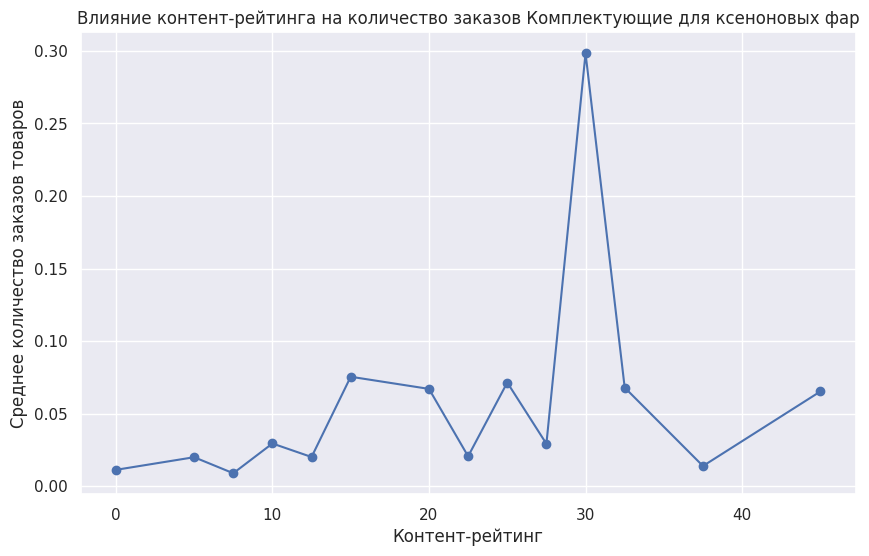

In [ ]:
# Группировка данных по контент-рейтингу и расчет среднего количества заказов товара
avg_orders_by_rating = auto_xenon.groupby('Контент-рейтинг')['Заказано товаров'].mean()

# Построение графика зависимости контент-рейтинга от количества заказов
plt.figure(figsize=(10, 6))
plt.plot(avg_orders_by_rating.index, avg_orders_by_rating.values, marker='o')
plt.xlabel('Контент-рейтинг')
plt.ylabel('Среднее количество заказов товаров')
plt.title('Влияние контент-рейтинга на количество заказов Комплектующие для ксеноновых фар')
plt.show()

На графике мы видим также неоднозначную картину: существует зависимость числа рейтинга на рост заказов. Но для контент-рейтинга с числом от "30" до "40" количество заказов почти обнуляется. Нужно провести доп.исследования: возможно есть выбросы или другие аномалии в данных

Продолжим наше исследование и построим градиентный бустинг:

In [ ]:
# Выделение признаков и целевой переменной
features = auto_xenon[['Контент-рейтинг']]
target = auto_xenon['Заказано товаров']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04825353167127476


Значение среднеквадратической ошибки (MSE) составляет 0.04825353167127476. MSE показывает среднеквадратическую разницу между фактическими и прогнозируемыми значениями. Чем ближе значение MSE к нулю, тем лучше модель способна предсказывать количество заказанных товаров.

Таким образом, модель градиентного бустинга в данном случае показывает хорошие результаты с низким значением MSE. Это указывает на высокую точность предсказаний модели для количества заказов товаров во 2-й категории.

По результатам исследования можно заключить, что модель градиентного бустинга хорошо предсказывает количество заказов товаров для 2-й категории на основе контент-рейтинга. Однако, для полноценной оценки модели нужно также учесть другие метрики и провести дополнительные анализы, такие как средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2).   

In [ ]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Расчет и вывод MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Расчет и вывод R^2
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Absolute Error: 0.04652746381236374
R^2 Score: 0.03845986704095217


**Полученные результаты показывают, что модель имеет невысокую точность предсказаний с Mean Squared Error (MSE) приблизительно равным 0.0483, Mean Absolute Error (MAE) равным 0.0465 и R^2 Score равным 0.0385.**   

#### **1.4.4 Общий вывод**

В данном решении был проведен анализ влияния контент-рейтинга на количество заказов товаров категорий "автомобильные фары", "комплектующие для ксеноновых фар" и "автомобильных ламп" - 6,2 и 4 категории соответственно, с использованием модели градиентного бустинга из библиотеки scikit-learn.

Полученные результаты показывают, что модель имеет невысокую точность предсказаний с MSE ,MAE и R^2 Score.

Поэтому, можно рассмотреть другие методы машинного обучения, а также провести дополнительную предобработку данных или использовать другие признаки для более точного предсказания количества заказов товаров.

### **1.5 ML-регрессия эксперименты, подбор гиперпааметров GBR, переходим к DL-регрессии, параметризация данных, модель**

В данном коде мы решили применить модели машинного обучения для предсказания количества заказанных товаров.

Целевая переменная в нашем случае представляет собой количество товаров, которое было заказано.  

С учётом наиболее грамотного разбиения на train/test, возможных вариантов алгоритмов и подходящих для данной задачи метрик, мы сравним модели и выбрать лучшую.  

Создадим список моделей для алгоритмов:  
Lasso(),  
Ridge(),  
DecisionTreeRegressor(),  
RandomForestRegressor(),  
GradientBoostingRegressor(),  

Напишем функцию, которая будет обучать каждую модель на train-выборке, делать прогноз на тестовых данных и выводить метрики MSE, MAE, R2, а также MAPE.   

In [ ]:
from sklearn.preprocessing import StandardScaler # для стандартизации признаков. Он масштабирует признаки таким образом,
                                                #чтобы они имели среднее значение 0 и стандартное отклонение 1.
from sklearn.linear_model import Lasso, Ridge # являются линейными моделями регрессии.
                                              #Они используются для аппроксимации линейной зависимости между признаками
                                              # и целевой переменной, при этом минимизируя сумму квадратов отклонений.
from sklearn.tree import DecisionTreeRegressor # является моделью регрессии на основе решающих деревьев.
                                               #Он используется для построения дерева решений, которое разбивает данные на более
                                              #мелкие подгруппы с целью предсказания значений целевой переменной.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # RandomForestRegressor является ансамблевой
                                              #моделью регрессии на основе случайных лесов. Он используется для комбинирования нескольких
                                              #деревьев решений, чтобы получить более точные предсказания.
                                              # GradientBoostingRegressor является ансамблевой моделью регрессии,
                                              # но на этот раз на основе градиентного бустинга.
                                              #Он используется для последовательного создания и добавления моделей,
                                              #чтобы снизить ошибку прогнозирования.
from sklearn.metrics import mean_absolute_error, mean_squared_error #mean_absolute_error используется для вычисления средней
                                              #абсолютной ошибки между прогнозируемыми и фактическими значениями.
                                              #mean_squared_error используется для вычисления средней квадратичной ошибки
                                              # между прогнозируемыми и фактическими значениями.

Для обучения нашей модели выполним дополнительные преобразования:

In [ ]:
# Удаляем столбцы col1 и col2
baza_analysts_promotions_model = baza_analysts_promotions.drop(['Категория 3-го уровня', 'Товары', 'Модель','Акции'], axis=1)

In [ ]:
#Изменим тип данных
baza_analysts_promotions_model['День'] = pd.to_numeric(baza_analysts_promotions_model['День'].astype(int))

In [ ]:
baza_analysts_promotions_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236685 entries, 0 to 236684
Data columns (total 22 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Ozon ID                                             236685 non-null  int64  
 1   Артикул                                             236685 non-null  int64  
 2   День                                                236685 non-null  int64  
 3   Уникальные посетители, всего                        236685 non-null  int64  
 4   Уникальные посетители с просмотром карточки товара  236685 non-null  int64  
 5   Показы, всего                                       236685 non-null  int64  
 6   Показы на карточке товара                           236685 non-null  int64  
 7   Показы в поиске и каталоге                          236685 non-null  int64  
 8   Позиция в поиске и каталоге                         236685 non-n

In [ ]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = baza_analysts_promotions_model.drop('Заказано товаров', axis=1)
y = baza_analysts_promotions_model['Заказано товаров']

In [ ]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# задаем список моделей
models = [
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape = perc_error_abs.sum() / len(y_true)
    return mape


# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
            mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            mape(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )


# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train,X_test=X_test_st, y_test=y_test)

Lasso()
MAE:0.08 MSE:0.07 MAPE:inf R2:-0.00 
Ridge()
MAE:0.03 MSE:0.01 MAPE:inf R2:0.78 
DecisionTreeRegressor()
MAE:0.00 MSE:0.00 MAPE:0.00 R2:0.98 
RandomForestRegressor()
MAE:0.00 MSE:0.00 MAPE:0.00 R2:1.00 
GradientBoostingRegressor()
MAE:0.00 MSE:0.00 MAPE:inf R2:0.98 


#### **1.5.1 Вывод**

Наш код выполнил следующие действия:  
Данный код выполняет следующие действия:

1. Разделяет данные на обучающую и валидационную выборки с помощью функции train_test_split.
2. Создает объект класса StandardScaler и применяет его к обучающей выборке, чтобы выполнить стандартизацию признаков.
3. Применяет трансформацию стандартизации к тестовой выборке с использованием того же объекта StandardScaler.
4. Задает список моделей для обучения.
5. Определяет функцию mape, которая вычисляет среднюю абсолютную процентную ошибку (MAPE).
6. Определяет функцию make_prediction, которая принимает на вход модель и данные, обучает модель и делает предсказания на тестовой выборке, а затем выводит значения различных метрик - средней абсолютной ошибки (MAE), средней квадратичной ошибки (MSE), MAPE и коэффициента детерминации (R2).
7. В цикле проходится по списку моделей и для каждой модели вызывает функцию make_prediction с соответствующими аргументами.
8. Выводит на экран результаты метрик для каждой модели.


Мы опробовали несколько моделей машинного обучения, таких как Lasso, Ridge, DecisionTreeRegressor, RandomForestRegressor и GradientBoostingRegressor. Для каждой модели мы вычислили несколько метрик, таких как среднюю абсолютную ошибку (MAE), среднюю квадратичную ошибку (MSE), среднюю абсолютную процентную ошибку (MAPE) и коэффициент детерминации (R2).

По результатам выполнения кода видно следующее:  
- Модель Lasso показывает среднюю абсолютную ошибку (MAE) 0.08, довольно высокую среднюю квадратичную ошибку (MSE) 0.07 и неопределенное значение MAPE, что может быть вызвано делением на ноль в вычислении процентной ошибки. Также R2 близок к нулю, что указывает на то, что модель не объясняет многое из дисперсии данных.  
- Модель Ridge показывает более низкую MAE 0.03, более низкую MSE 0.01, также возвращает неопределенное значение MAPE. Значение R2 равно 0.78, что говорит о более лучшей объясняющей способности модели по сравнению с Lasso.  
- Модель DecisionTreeRegressor показывает очень низкую MAE и MSE, равные 0.00, а также нулевое значение MAPE и высокое значение R2 (0.98), что указывает на отличную объясняющую способность модели.  
- Модель RandomForestRegressor также показывает низкие значения MAE и MSE, равные 0.00, нулевое значение MAPE и R2 равное 1.00, что свидетельствует о еще лучшей объясняющей способности модели по сравнению с DecisionTreeRegressor.  
- Модель GradientBoostingRegressor также показывает низкие значения MAE и MSE, и неопределенное значение MAPE. R2 равен 0.98, что говорит о хорошей объясняющей способности модели.  

**На основании предоставленных метрик и результатов можно сделать вывод, что модели DecisionTreeRegressor, RandomForestRegressor и GradientBoostingRegressor показывают хорошие результаты предсказания целевых переменных. Они имеют очень низкие значения средней абсолютной ошибки и средней квадратичной ошибки, приближающиеся к нулю, а также высокие значения коэффициента детерминации (R2), близкие к 1. Это говорит о том, что эти модели хорошо объясняют вариацию в данных и имеют хорошую точность предсказания. Таким образом, можно сказать, что эти модели работают хорошо для данного набора данных.**

Этот код предоставляет нам полезные метрики для оценки производительности моделей и помогает определить, какая модель наилучшим образом справляется с нашей целевой переменной.

#### **1.5.2 Важность признаков**

Заново обучим  модель и сделаем прогноз;  

Создадим датафрейм с важностью, выведем его в порядке убывания важности признаков;  

Какие признаки наиболее важны для этой модели?    

In [ ]:
# задайте список моделей
models = [
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    return perc_error_abs.sum() / len(y_true)


# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
            mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            mape(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )


# напишите цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test,
    )

# обучим финальную модель
final_model = GradientBoostingRegressor()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': final_model.feature_importances_})
fi_df.sort_values('importance', ascending=False)

Lasso()
MAE:0.08 MSE:0.07 MAPE:inf R2:-0.00 
Ridge()
MAE:0.03 MSE:0.01 MAPE:inf R2:0.78 
DecisionTreeRegressor()
MAE:0.00 MSE:0.00 MAPE:0.00 R2:0.99 
RandomForestRegressor()
MAE:0.00 MSE:0.00 MAPE:0.00 R2:0.99 
GradientBoostingRegressor()
MAE:0.00 MSE:0.00 MAPE:inf R2:0.98 


,feature,importance
13,Заказано на сумму,0.798027
14,Заказано товаров по акции,0.078399
18,"Текущая цена с учетом скидки, руб.",0.054691
16,"Цена до скидки (перечеркнутая цена), руб.",0.036873
9,"В корзину, всего",0.019163
19,Категория_encoded,0.007301
3,"Уникальные посетители, всего",0.001098
7,Показы в поиске и каталоге,0.000793
6,Показы на карточке товара,0.000793
15,Заказано на сумму по акции,0.000594


Этот код предоставляет нам полезные метрики для оценки производительности моделей и помогает определить, какая модель наилучшим образом справляется с нашей целевой переменной.

</div>
<table style="width:100%">
  <tr style="background-color: blue; color: white;">
    <td style="display: flex; justify-content: center; align-items: center;"><b><font size="5">Спасибо за внимание!</font></b></td>
  </tr>
</table>

<!--END_SECTION:waka-->
---


<img src="https://raw.githubusercontent.com/trinib/trinib/82213791fa9ff58d3ca768ddd6de2489ec23ffca/images/footer.svg" width="100%">